# Versão de notebook feita para a community edition

O que queremos habitualmente é trabalhar dados com armazenamento externo ao próprio databricks. 
No cenário BigData em que tenho outros serviços a partilharem os mesmo dados, a gravação local não é o ideal. Queremos um armazenamento externo.

Neste exercício, para facilitar o acesso vamos utilizar os dados na conta local databricks.

Os ficheiros iniciais estão num Data Lake Storage, vamos fazer mount para copiar os ficheiros necessários.

nota:
Os ficheiros têm origem neste url: https://www.kaggle.com/theworldbank/world-development-indicators

In [0]:
dbutils.fs.unmount("/mnt/adlsg2bvbRO")

In [0]:
############## READONLY #################
configs = {"fs.azure.account.auth.type": "OAuth",
           "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
           "fs.azure.account.oauth2.client.id": "a32e3374-4070-4af4-a125-007ab1162cb6",
           "fs.azure.account.oauth2.client.secret": "Q/Q:x66Az?n.NnugjIYwDb9JZJ2cRVgi",
           "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/72f988bf-86f1-41af-91ab-2d7cd011db47/oauth2/token"}


dbutils.fs.mount(
  source = "abfss://main@adlsg2bvb.dfs.core.windows.net/",
  mount_point = "/mnt/adlsg2bvbRO",
  extra_configs = configs)

####a partir de agora é possivel aceder ao Data Lake a partir de /mnt/adlsg2bvbRO

In [0]:
mntADLS = "/mnt/adlsg2bvbRO"

dbutils.fs.ls(mntADLS)

Out[1]: [FileInfo(path='dbfs:/mnt/adlsg2bvbRO/a1.txt', name='a1.txt', size=5),
 FileInfo(path='dbfs:/mnt/adlsg2bvbRO/dummy/', name='dummy/', size=0),
 FileInfo(path='dbfs:/mnt/adlsg2bvbRO/iotHub/', name='iotHub/', size=0),
 FileInfo(path='dbfs:/mnt/adlsg2bvbRO/old_training/', name='old_training/', size=0),
 FileInfo(path='dbfs:/mnt/adlsg2bvbRO/synapse/', name='synapse/', size=0),
 FileInfo(path='dbfs:/mnt/adlsg2bvbRO/training/', name='training/', size=0)]

####Copiar os ficheiros para a conta local

In [0]:
dbutils.fs.cp(mntADLS + "/old_training/_bvb/WorldDataBank/WorldDevelopmentIndicators/WDIData.csv",
             "/WorldDataBank/WDIData.csv")

Out[3]: True

In [0]:
dbutils.fs.cp(mntADLS + "/old_training/_bvb/WorldDataBank/WorldDevelopmentIndicators/WDICountry.csv",
             "/WorldDataBank/WDICountry.csv")

Out[4]: True

In [0]:
dbutils.fs.ls("/WorldDataBank")

Out[5]: [FileInfo(path='dbfs:/WorldDataBank/WDICountry.csv', name='WDICountry.csv', size=136590),
 FileInfo(path='dbfs:/WorldDataBank/WDIData.csv', name='WDIData.csv', size=210638534),
 FileInfo(path='dbfs:/WorldDataBank/parquet/', name='parquet/', size=0)]

####a partir daqui o exercício é idêntico mas utilizando os ficheiros locais

In [0]:
csvFile = "/WorldDataBank/WDIData.csv"

df = (spark.read           
  .option("header", "true") 
  .option("sep", ",") 
  .option("inferSchema", "true")
  .csv(csvFile)
)

df.printSchema()

root
-- Country Name: string (nullable = true)
-- Country Code: string (nullable = true)
-- Indicator Name: string (nullable = true)
-- Indicator Code: string (nullable = true)
-- 1960: double (nullable = true)
-- 1961: double (nullable = true)
-- 1962: double (nullable = true)
-- 1963: double (nullable = true)
-- 1964: double (nullable = true)
-- 1965: double (nullable = true)
-- 1966: double (nullable = true)
-- 1967: double (nullable = true)
-- 1968: double (nullable = true)
-- 1969: double (nullable = true)
-- 1970: double (nullable = true)
-- 1971: double (nullable = true)
-- 1972: double (nullable = true)
-- 1973: double (nullable = true)
-- 1974: double (nullable = true)
-- 1975: double (nullable = true)
-- 1976: double (nullable = true)
-- 1977: double (nullable = true)
-- 1978: double (nullable = true)
-- 1979: double (nullable = true)
-- 1980: double (nullable = true)
-- 1981: double (nullable = true)
-- 1982: double (nullable = true)
-- 1983: double (nullable = true)
-- 1984: double (nullable = true)
-- 1985: double (nullable = true)
-- 1986: double (nullable = true)
-- 1987: double (nullable = true)
-- 1988: double (nullable = true)
-- 1989: double (nullable = true)
-- 1990: double (nullable = true)
-- 1991: double (nullable = true)
-- 1992: double (nullable = true)
-- 1993: double (nullable = true)
-- 1994: double (nullable = true)
-- 1995: double (nullable = true)
-- 1996: double (nullable = true)
-- 1997: double (nullable = true)
-- 1998: double (nullable = true)
-- 1999: double (nullable = true)
-- 2000: double (nullable = true)
-- 2001: double (nullable = true)
-- 2002: double (nullable = true)
-- 2003: double (nullable = true)
-- 2004: double (nullable = true)
-- 2005: double (nullable = true)
-- 2006: double (nullable = true)
-- 2007: double (nullable = true)
-- 2008: double (nullable = true)
-- 2009: double (nullable = true)
-- 2010: double (nullable = true)
-- 2011: double (nullable = true)
-- 2012: double (nullable = true)
-- 2013: double (nullable = true)
-- 2014: double (nullable = true)
-- 2015: double (nullable = true)
-- 2016: double (nullable = true)
-- 2017: double (nullable = true)
-- _c62: string (nullable = true)

In [0]:
#display(df)
df.count()

Out[7]: 422400

In [0]:
#cls = ('Indicator Code','Indicator Name')
df.select('Indicator Code').distinct().count()
# display(df.select([c for c in df.columns if c in cls]).distinct())

Out[10]: 1600

In [0]:
import pyspark.sql.functions as f
df2 = df.filter(f.col('Indicator Code')=='NE.RSB.GNFS.KN')
display(df2)

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,_c62
Arab World,ARB,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Caribbean small states,CSS,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Central Europe and the Baltics,CEB,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Early-demographic dividend,EAR,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
East Asia & Pacific,EAS,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
East Asia & Pacific (excluding high income),EAP,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
East Asia & Pacific (IDA & IBRD countries),TEA,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Euro area,EMU,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Europe & Central Asia,ECS,External balance on goods and services (constant LCU),NE.RSB.GNFS.KN,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Europe & Central Asia (excluding high income),ECA,External balance on goods and services (constant LCU),NE

In [0]:
df

Out[12]: DataFrame[Country Name: string, Country Code: string, Indicator Name: string, Indicator Code: string, 1960: double, 1961: double, 1962: double, 1963: double, 1964: double, 1965: double, 1966: double, 1967: double, 1968: double, 1969: double, 1970: double, 1971: double, 1972: double, 1973: double, 1974: double, 1975: double, 1976: double, 1977: double, 1978: double, 1979: double, 1980: double, 1981: double, 1982: double, 1983: double, 1984: double, 1985: double, 1986: double, 1987: double, 1988: double, 1989: double, 1990: double, 1991: double, 1992: double, 1993: double, 1994: double, 1995: double, 1996: double, 1997: double, 1998: double, 1999: double, 2000: double, 2001: double, 2002: double, 2003: double, 2004: double, 2005: double, 2006: double, 2007: double, 2008: double, 2009: double, 2010: double, 2011: double, 2012: double, 2013: double, 2014: double, 2015: double, 2016: double, 2017: double, _c62: string]

In [0]:
def squared(s):
  return s * s
spark.udf.register("squaredWithPython", squared)

Out[13]: <function __main__.squared(s)>

In [0]:
spark.range(1, 20).registerTempTable("test")

In [0]:
%sql select id, squaredWithPython(id) as id_squared from test

id,id_squared
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81
10,100


In [0]:
from pyspark.sql.functions import array, col, explode, lit, struct
from pyspark.sql import DataFrame

def melt_df(df,id_vars, value_vars,var_name,value_name):
    """Convert :class:`DataFrame` from wide to long format."""

    # Create array<struct<variable: str, value: ...>>
    _vars_and_vals = array(*(
        struct(lit(c).alias(var_name), col(c).alias(value_name))
        for c in value_vars))

    # Add to the DataFrame and explode
    _tmp = df.withColumn("_vars_and_vals", explode(_vars_and_vals))

    cols = id_vars + [
            col("_vars_and_vals")[x].alias(x) for x in [var_name, value_name]]
    return _tmp.select(*cols)
  
#import pandas as pd

#pdf = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
#                   'B': {0: 1, 1: 3, 2: 5},
#                   'C': {0: 2, 1: 4, 2: 6}})

#pd.melt(pdf, id_vars=['A'], value_vars=['B', 'C'])
#sdf = spark.createDataFrame(pdf)
#melt_df(sdf, id_vars=['A'], value_vars=['B', 'C'],var_name='Col_Name',value_name='NA').show()

In [0]:
df2 = melt_df(df, id_vars=['Country Code','Indicator Code'], value_vars=['1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'],var_name='Ano',value_name='Valor')
df2.count()
#display(df2)

Out[16]: 23232000

In [0]:
from pyspark.sql.types import IntegerType

df3 = df2 \
  .withColumnRenamed("Country Code", "idCountry") \
  .withColumnRenamed("Indicator Code", "idIndicator") \
  .withColumn("Ano", df2["Ano"].cast(IntegerType())) \
  .na.drop(subset=["Valor"]) 
df3.printSchema()
#df3.count()
#display(df3)

root
-- idCountry: string (nullable = true)
-- idIndicator: string (nullable = true)
-- Ano: integer (nullable = true)
-- Valor: double (nullable = true)

In [0]:
destDataDir = "/WorldDataBank/parquet/data_csv"
df3.repartition(1).write.mode('overwrite').option("header", "true").csv(destDataDir)

In [0]:
destDataDir = "/WorldDataBank/parquet/data_part"
df3.repartition('idIndicator').write.mode('overwrite').partitionBy('idIndicator').parquet(destDataDir)

In [0]:
destDataDir = "/WorldDataBank/parquet/data"
df3.repartition(1).write.mode('overwrite').parquet(destDataDir)

In [0]:
%sql
create database WorldDataBank;

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.sql.AnalysisException: org.apache.hadoop.hive.metastore.api.AlreadyExistsException: Database worlddatabank already exists;
	at org.apache.spark.sql.hive.HiveExternalCatalog.$anonfun$withClient$2(HiveExternalCatalog.scala:161)
	at org.apache.spark.sql.hive.HiveExternalCatalog.maybeSynchronized(HiveExternalCatalog.scala:112)
	at org.apache.spark.sql.hive.HiveExternalCatalog.$anonfun$withClient$1(HiveExternalCatalog.scala:150)
	at com.databricks.backend.daemon.driver.ProgressReporter$.withStatusCode(ProgressReporter.scala:377)
	at com.databricks.backend.daemon.driver.ProgressReporter$.withStatusCode(ProgressReporter.scala:363)
	at com.databricks.spark.util.SparkDatabricksProgressReporter$.withStatusCode(ProgressReporter.scala:34)
	at org.apache.spark.sql.hive.HiveExternalCatalog.withClient(HiveExternalCatalog.scala:149)
	at org.apache.spark.sql.hive.HiveExternalCatalog.createDatabase(HiveExternalCatalog.scala:258)
	at org.apache.spark.sql.catalyst.catalog.ExternalCatalogWithListener.createDatabase(ExternalCatalogWithListener.scala:52)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.createDatabase(SessionCatalog.scala:247)
	at org.apache.spark.sql.execution.command.CreateDatabaseCommand.run(ddl.scala:84)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:70)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:68)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:79)
	at org.apache.spark.sql.Dataset.$anonfun$logicalPlan$1(Dataset.scala:234)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3728)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$5(SQLExecution.scala:116)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:248)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$1(SQLExecution.scala:101)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.execution.SQLExecution$.withCustomExecutionEnv(SQLExecution.scala:77)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:198)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3726)
	at org.apache.spark.sql.Dataset. (Dataset.scala:234)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:104)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:101)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:676)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:671)
	at org.apache.spark.sql.SQLContext.sql(SQLContext.scala:672)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.$anonfun$executeSql$1(SQLDriverLocal.scala:91)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:238)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at scala.collection.TraversableLike.map(TraversableLike.scala:238)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:231)
	at scala.collection.immutable.List.map(List.scala:298)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.executeSql(SQLDriverLocal.scala:37)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.repl(SQLDriverLocal.scala:144)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$11(DriverLocal.scala:451)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:232)
	

In [0]:
%sql 
use WorldDataBank;

DROP table if exists wdb_data;

CREATE TABLE IF NOT EXISTS wdb_data(
idCountry STRING,
 idIndicator STRING,
 Ano INT,
 Valor DOUBLE)
USING parquet
--partitioned by (y,m)
LOCATION '/WorldDataBank/parquet/data';

In [0]:
%sql

SELECT * FROM wdb_data limit 10;

idCountry,idIndicator,Ano,Valor
ARB,EG.CFT.ACCS.ZS,2000,73.675897797943
ARB,EG.CFT.ACCS.ZS,2001,74.9280588357476
ARB,EG.CFT.ACCS.ZS,2002,76.2554004102489
ARB,EG.CFT.ACCS.ZS,2003,77.1298045373055
ARB,EG.CFT.ACCS.ZS,2004,78.1141445764652
ARB,EG.CFT.ACCS.ZS,2005,79.0898588375658
ARB,EG.CFT.ACCS.ZS,2006,79.883248963943
ARB,EG.CFT.ACCS.ZS,2007,80.6034013849682
ARB,EG.CFT.ACCS.ZS,2008,81.2438972716056
ARB,EG.CFT.ACCS.ZS,2009,81.84498227857


In [0]:
%sql

SELECT Ano,sum(Valor) FROM wdb_data where idIndicator = 'SP.POP.TOTL' GROUP BY ano ORDER  BY ano;

Ano,sum(Valor)
1963,3.2278993278E10
1964,3.2969458753E10
1965,3.3677154712E10
1966,3.4422599938E10
1967,3.5166714397E10
1968,3.5924062242E10
1969,3.6718405135E10
1970,3.7524386467E10
1971,3.8349832529E10
1972,3.916773436E10


In [0]:
cls = ('Indicator Code','Indicator Name')
destDataDir = "/WorldDataBank/parquet/indicators"

dfIndicators = df \
  .select([c for c in df.columns if c in cls]) \
  .distinct() \
  .withColumnRenamed("Indicator Code", "idIndicator") \
  .withColumnRenamed("Indicator Name", "name") 

dfIndicators.repartition(1).write.mode('overwrite').parquet(destDataDir)
dfIndicators.printSchema()
  

root
-- name: string (nullable = true)
-- idIndicator: string (nullable = true)

In [0]:
%sql 
use WorldDataBank;

drop table if exists wdb_indicators;

CREATE TABLE IF NOT EXISTS wdb_indicators(
 idIndicator STRING,
 name STRING)
USING parquet
--partitioned by (y,m)
LOCATION '/WorldDataBank/parquet/indicators';

SELECT * FROM wdb_indicators limit 10;

idIndicator,name
TX.QTY.MRCH.XD.WD,Export volume index (2000 = 100)
SH.STA.FGMS.ZS,Female genital mutilation prevalence (%)
TX.VAL.MRCH.AL.ZS,Merchandise exports to economies in the Arab World (% of total merchandise exports)
TX.VAL.MRCH.R4.ZS,Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)
DT.IXA.DPPG.CD.CG,Net change in interest arrears (current US$)
GC.LBL.TOTL.GD.ZS,"Net incurrence of liabilities, total (% of GDP)"
DT.AMT.PNGC.CD,"PNG, commercial banks and other creditors (AMT, current US$)"
DT.DOD.BLTC.CD,"PPG, bilateral concessional (DOD, current US$)"
IQ.CPA.ECON.XQ,CPIA economic management cluster average (1=low to 6=high)
NE.RSB.GNFS.KN,External balance on goods and services (constant LCU)


In [0]:
csvFileC = "/WorldDataBank/WDICountry.csv"
destDataDir = "/WorldDataBank/parquet/countries"

dfC = (spark.read           
  .option("header", "true") 
  .option("sep", ",") 
  .option("inferSchema", "true")
  .csv(csvFileC)
)

dfC = dfC \
  .withColumnRenamed("Country Code"   , "idCountry") \
  .withColumnRenamed("Short Name"     , "name") \
  .withColumnRenamed("Table Name"     , "name2") \
  .withColumnRenamed("2-alpha code"   , "alphaCode") \
  .withColumnRenamed("Currency Unit"  , "currency") \
  .withColumnRenamed("Region"         , "region") \
  .withColumnRenamed("Income Group"   , "income") \
  .withColumnRenamed("Lending category", "lendingCat") \
  .withColumnRenamed("Other groups"   , "otherGroups") 

dfC = dfC.select("idCountry","name","name2","alphaCode","currency","region","income","lendingCat","otherGroups")

dfC.repartition(1).write.mode('overwrite').parquet(destDataDir)

dfC.printSchema()

root
-- idCountry: string (nullable = true)
-- name: string (nullable = true)
-- name2: string (nullable = true)
-- alphaCode: string (nullable = true)
-- currency: string (nullable = true)
-- region: string (nullable = true)
-- income: string (nullable = true)
-- lendingCat: string (nullable = true)
-- otherGroups: string (nullable = true)

In [0]:
%sql 
use WorldDataBank;

drop table if exists wdb_countries;

CREATE TABLE IF NOT EXISTS wdb_countries(
 idCountry STRING,
 name STRING,
 name2 STRING,
 alphaCode STRING,
 currency STRING,
 region STRING,
 income STRING,
 lendingCat STRING,
 otherGroups STRING
 )
USING parquet
LOCATION '/WorldDataBank/parquet/countries';

SELECT * FROM wdb_countries limit 10;

idCountry,name,name2,alphaCode,currency,region,income,lendingCat,otherGroups
ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income,null,null
AFG,Afghanistan,Afghanistan,AF,Afghan afghani,South Asia,Low income,IDA,HIPC
AGO,Angola,Angola,AO,Angolan kwanza,Sub-Saharan Africa,Lower middle income,IBRD,null
ALB,Albania,Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,IBRD,null
AND,Andorra,Andorra,AD,Euro,Europe & Central Asia,High income,null,null
ARB,Arab World,Arab World,1A,null,null,null,null,null
ARE,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,Middle East & North Africa,High income,null,null
ARG,Argentina,Argentina,AR,Argentine peso,null,null,null,null
The World Bank systematically assesses the appropriateness of official exchange rates as conversion factors. An alternative conversion factor is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate effectively applied to domestic transactions of foreign currencies and traded products. In the case of Argentina,"the World Bank has found that during 2012-2015 there were two exchange rates (official and parallel) and parallel exchange rate (blue chip swap rate) was used in around 20% of the transactions. Based on this information an alternative conversion factor has been calculated using a weighted average method for this period.""",Latin America & Caribbean,AR,2004,Value added at basic prices (VAB),IBRD,BPM6,null
ARM,Armenia,Armenia,AM,Armenian dram,Europe & Central Asia,Upper middle income,IBRD,null


In [0]:
%sql
drop view if exists wdb_country;

CREATE VIEW wdb_country
as
SELECT * from wdb_countries WHERE region is not  null 
UNION
SELECT 'ARG' , 'Argentina' , 'Argentina' , alphaCode , 'Argentine peso' , 'Latin America & Caribbean' , 'High income' , 'IBRD' , null 
from wdb_countries WHERE region is not  null and alphaCode = 'AR'

In [0]:
%sql
drop view if exists wdb_region;

CREATE VIEW wdb_region
as
SELECT idCountry,name,name2,alphaCode from wdb_countries WHERE region is  null and idCountry != 'ARG'

In [0]:
%sql

SELECT d.Ano,sum(d.Valor) FROM wdb_data d
                            LEFT JOIN wdb_country c on d.idCountry = c.idCountry
                          where d.idIndicator = 'SP.POP.TOTL' and c.idCountry is null
                          GROUP BY d.ano 
                          ORDER  BY d.ano;

Ano,sum(Valor)
1963,2.910578585E10
1964,2.9731017604E10
1965,3.0372053393E10
1966,3.1047696585E10
1967,3.1722329812E10
1968,3.2409423126E10
1969,3.3129335842E10
1970,3.3860115126E10
1971,3.460828709E10
1972,3.5349658984E10


In [0]:
%sql

SELECT d.Ano,sum(d.Valor) FROM wdb_data d
                            JOIN wdb_region r on d.idCountry = r.idCountry
                          where d.idIndicator = 'SP.POP.TOTL' and r.idCountry = 'WLD'
                          GROUP BY d.ano 
                          ORDER  BY d.ano;

Ano,sum(Valor)
1963,3.191786428E9
1964,3.257459749E9
1965,3.324545319E9
1966,3.394783653E9
1967,3.464689185E9
1968,3.535355316E9
1969,3.610178793E9
1970,3.685753341E9
1971,3.763393039E9
1972,3.840269676E9


In [0]:
%sql
SELECT * FROM wdb_indicators 
where idIndicator in ('SI.DST.05TH.20','SI.DST.04TH.20','SI.DST.03RD.20','SI.DST.02ND.20','SI.DST.FRST.20')

idIndicator,name
SI.DST.FRST.20,Income share held by lowest 20%
SI.DST.04TH.20,Income share held by fourth 20%
SI.DST.03RD.20,Income share held by third 20%
SI.DST.02ND.20,Income share held by second 20%
SI.DST.05TH.20,Income share held by highest 20%


In [0]:
%sql
SELECT a.Ano,n5.n5,n4.n4 ,n3.n3,n2.n2,n1.n1 FROM 
(
  SELECT distinct  Ano  
    FROM wdb_data 
    where idIndicator in ('SI.DST.05TH.20','SI.DST.04TH.20','SI.DST.03RD.20','SI.DST.02ND.20','SI.DST.FRST.20')  and idCountry = 'PRT'
) a
  left join (SELECT Ano,valor as n5 FROM wdb_data  where idIndicator = 'SI.DST.05TH.20' and idCountry = 'PRT') n5 ON a.ano = n5.ano
  left join (SELECT Ano,valor as n4 FROM wdb_data  where idIndicator = 'SI.DST.04TH.20' and idCountry = 'PRT') n4 ON a.ano = n4.ano
  left join (SELECT Ano,valor as n3 FROM wdb_data  where idIndicator = 'SI.DST.03RD.20' and idCountry = 'PRT') n3 ON a.ano = n3.ano
  left join (SELECT Ano,valor as n2 FROM wdb_data  where idIndicator = 'SI.DST.02ND.20' and idCountry = 'PRT') n2 ON a.ano = n2.ano
  left join (SELECT Ano,valor as n1 FROM wdb_data  where idIndicator = 'SI.DST.FRST.20' and idCountry = 'PRT') n1 ON a.ano = n1.ano
  order by ano

Ano,n5,n4,n3,n2,n1
2003,45.8,21.4,15.3,11.2,6.2
2004,46.2,21.1,15.1,11.2,6.4
2005,46.1,21.0,15.0,11.3,6.7
2006,45.4,21.7,15.1,11.1,6.7
2007,44.2,21.7,15.7,11.6,6.9
2008,44.1,21.6,15.8,11.7,6.9
2009,42.5,22.0,16.3,12.0,7.2
2010,43.4,21.9,15.9,11.8,7.0
2011,43.8,21.7,15.8,11.9,6.8
2012,43.2,22.1,16.2,12.1,6.5


In [0]:
%sql
SELECT a.Ano,n5.n5,n4.n4 ,n3.n3,n2.n2,n1.n1 FROM 
(
  SELECT distinct  Ano  
    FROM wdb_data 
    where idIndicator in ('SI.DST.05TH.20','SI.DST.04TH.20','SI.DST.03RD.20','SI.DST.02ND.20','SI.DST.FRST.20')  and idCountry = 'USA'
) a
  left join (SELECT Ano,valor as n5 FROM wdb_data  where idIndicator = 'SI.DST.05TH.20' and idCountry = 'USA') n5 ON a.ano = n5.ano
  left join (SELECT Ano,valor as n4 FROM wdb_data  where idIndicator = 'SI.DST.04TH.20' and idCountry = 'USA') n4 ON a.ano = n4.ano
  left join (SELECT Ano,valor as n3 FROM wdb_data  where idIndicator = 'SI.DST.03RD.20' and idCountry = 'USA') n3 ON a.ano = n3.ano
  left join (SELECT Ano,valor as n2 FROM wdb_data  where idIndicator = 'SI.DST.02ND.20' and idCountry = 'USA') n2 ON a.ano = n2.ano
  left join (SELECT Ano,valor as n1 FROM wdb_data  where idIndicator = 'SI.DST.FRST.20' and idCountry = 'USA') n1 ON a.ano = n1.ano
  order by ano

Ano,n5,n4,n3,n2,n1
1979,41.2,23.4,16.9,12.0,6.4
1986,43.2,23.6,16.5,11.2,5.5
1991,43.9,23.3,16.3,11.0,5.5
1994,45.7,22.7,15.7,10.6,5.3
1997,46.3,22.4,15.5,10.5,5.3
2000,46.0,22.3,15.6,10.6,5.4
2004,46.0,22.5,15.7,10.7,5.2
2007,46.5,22.5,15.5,10.5,5.1
2010,45.7,22.9,15.7,10.5,5.1
2013,46.4,22.7,15.4,10.3,5.1


In [0]:
%sql
SELECT c.name,c.region, valor as n5 FROM wdb_data d LEFT JOIN wdb_country c on d.idCountry = c.idCountry                  
    where idIndicator = 'SI.DST.05TH.20' and Ano = 2015 order by valor desc

name,region,n5
Namibia,Sub-Saharan Africa,63.7
Zambia,Sub-Saharan Africa,61.3
Brazil,Latin America & Caribbean,56.1
Colombia,Latin America & Caribbean,55.9
Panama,Latin America & Caribbean,55.3
Honduras,Latin America & Caribbean,54.0
Costa Rica,Latin America & Caribbean,53.9
Chile,Latin America & Caribbean,53.6
Paraguay,Latin America & Caribbean,52.7
Benin,Sub-Saharan Africa,52.1


In [0]:
%sql
--SI.DST.10TH.10
select d.ano,c.name,c.region,d.valor from wdb_data d
          join (select max(ano) ano,idCountry FROM wdb_data  where idIndicator = 'SI.DST.05TH.20' and valor >0 group by idCountry order by 1)x
            on d.ano = x.ano and  d.idCountry = x.idCountry
          left join wdb_country c
            on d.idCountry = c.idCountry
          where idIndicator = 'SI.DST.05TH.20' 
          order by valor

ano,name,region,valor
2005,Azerbaijan,Europe & Central Asia,30.2
2015,Slovak Republic,Europe & Central Asia,35.0
2016,Ukraine,Europe & Central Asia,35.1
2015,Slovenia,Europe & Central Asia,35.1
2015,Czech Republic,Europe & Central Asia,35.9
2016,Kosovo,Europe & Central Asia,36.1
2015,Norway,Europe & Central Asia,36.5
2015,Belgium,Europe & Central Asia,36.5
2016,Moldova,Europe & Central Asia,36.6
2015,Finland,Europe & Central Asia,36.7


In [0]:
%sql

select d.ano,c.name,c.region,d.valor from wdb_data d
          join (select max(ano) ano,idCountry FROM wdb_data  where idIndicator = 'SP.DYN.LE00.IN' and valor >0 group by idCountry order by 1)x
            on d.ano = x.ano and  d.idCountry = x.idCountry
          left join wdb_country c
            on d.idCountry = c.idCountry
          where idIndicator = 'SP.DYN.LE00.IN' 
          order by valor
          

In [0]:

%sql
drop view if exists  exercicio_lf_n5;
create temporary view exercicio_lf_n5
as
select life.ano anolf,life.name,life.region,lifeExpect,n5.ano anon5,n5.n5,n10.ano anon10,n10.n10 from
(
    select c.idCountry, d.ano,c.name,c.region,d.valor lifeExpect from wdb_data d
          join (select max(ano) ano,idCountry FROM wdb_data  where idIndicator = 'SP.DYN.LE00.IN' and valor >0 group by idCountry order by 1)x
            on d.ano = x.ano and  d.idCountry = x.idCountry
          left join wdb_country c
            on d.idCountry = c.idCountry
          where idIndicator = 'SP.DYN.LE00.IN' 
) life
inner join
(
    select c.idCountry, d.ano,c.name,c.region,d.valor n5 from wdb_data d
          join (select max(ano) ano,idCountry FROM wdb_data  where idIndicator = 'SI.DST.05TH.20' and valor >0 group by idCountry order by 1)x
            on d.ano = x.ano and  d.idCountry = x.idCountry
          left join wdb_country c
            on d.idCountry = c.idCountry
          where idIndicator = 'SI.DST.05TH.20' 
) n5
on life.idCountry = n5.idCountry
inner join
(
    select c.idCountry, d.ano,c.name,c.region,d.valor n10 from wdb_data d
          join (select max(ano) ano,idCountry FROM wdb_data  where idIndicator = 'SI.DST.10TH.10' and valor >0 group by idCountry order by 1)x
            on d.ano = x.ano and  d.idCountry = x.idCountry
          left join wdb_country c
            on d.idCountry = c.idCountry
          where idIndicator = 'SI.DST.10TH.10' 
) n10
on life.idCountry = n10.idCountry
order by lifeExpect
    

In [0]:
%sql 
select * from exercicio_lf_n5
--drop view exercicio_lf_n5

anolf,name,region,lifeExpect,anon5,n5,anon10,n10
2016,Sierra Leone,Sub-Saharan Africa,51.835,2011,42.4,2011,26.9
2016,Central African Republic,Sub-Saharan Africa,52.171,2008,60.9,2008,46.2
2016,Chad,Sub-Saharan Africa,52.903,2011,48.8,2011,32.4
2016,Nigeria,Sub-Saharan Africa,53.428,2009,49.0,2009,32.7
2016,Côte d'Ivoire,Sub-Saharan Africa,53.582,2015,47.8,2015,31.9
2016,Lesotho,Sub-Saharan Africa,54.174,2010,58.2,2010,40.9
2016,South Sudan,Sub-Saharan Africa,56.811,2009,50.6,2009,33.2
2016,Guinea-Bissau,Sub-Saharan Africa,57.403,2010,56.7,2010,42.0
2016,Burundi,Sub-Saharan Africa,57.481,2013,46.3,2013,31.0
2016,Eswatini,Sub-Saharan Africa,57.754,2009,56.7,2009,40.0


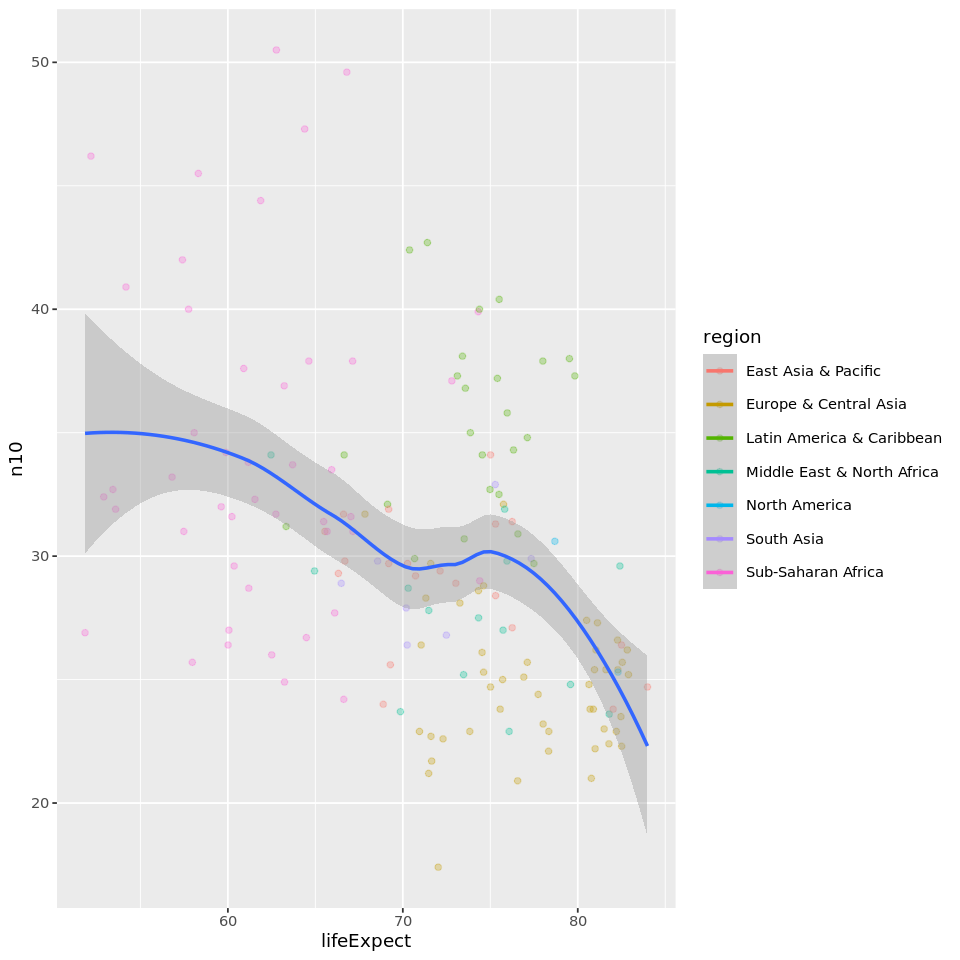

In [0]:
%r
library(SparkR)
library(ggplot2)
tbl<-sql("SELECT * FROM exercicio_lf_n5")

tbl_local <- collect(tbl)
#display(tbl_local)
ggplot(tbl_local, aes(lifeExpect, n10, color = region, group = 1)) + geom_point(alpha = 0.3) + stat_smooth()

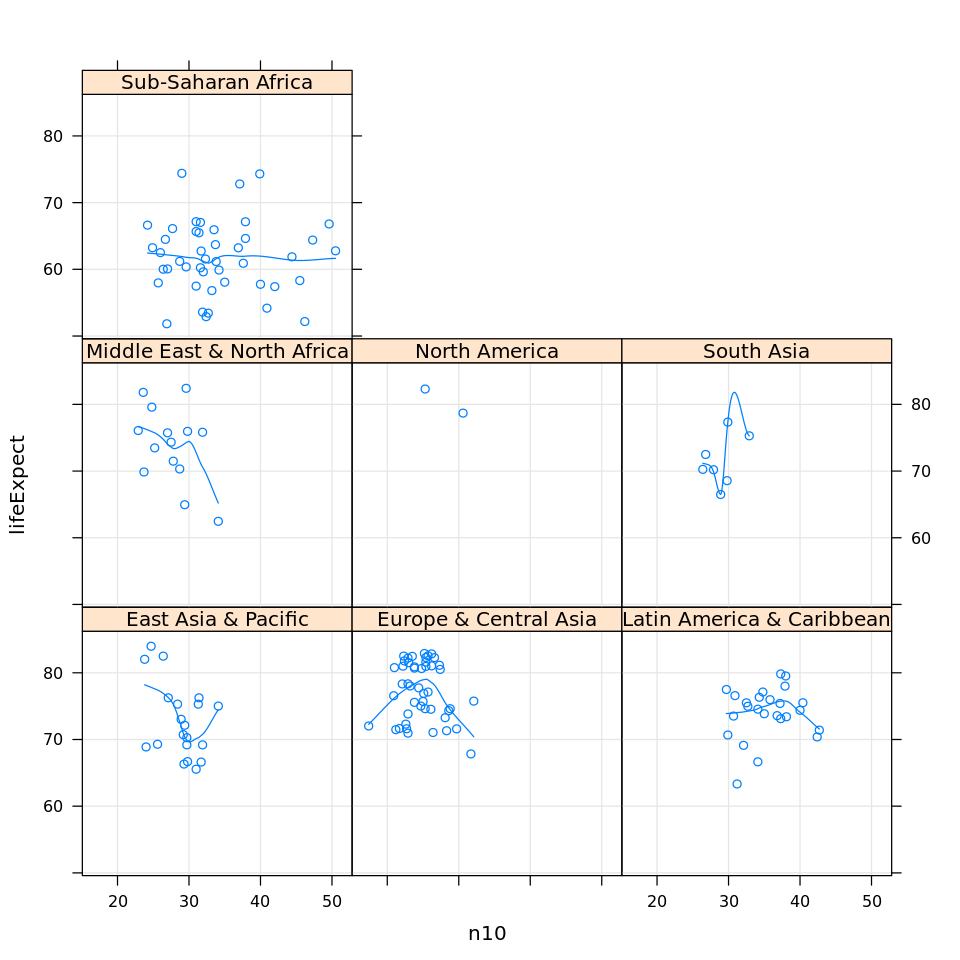

In [0]:
%r
library(lattice)
xyplot(lifeExpect ~ n10 | region , tbl_local,  type = c("p", "g", "smooth"))